In [ ]:
# Load Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [ ]:
# Load Dataset
d = pd.read_csv('Fraud.csv')

In [ ]:
# Make a copy to preserve original data
df = d.copy()

To avoid accidental modification of original dataset.

In [ ]:
# Basic Dataset Info
print("Total Number of Rows",df.shape[0])
print("Total Number of Columns",df.shape[1])

Total Number of Rows 6376124
Total Number of Columns 11


In [ ]:
# first 5 records
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# last 5 records
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6376119,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6376120,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6376121,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6376122,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6376123,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6376124 entries, 0 to 6376123
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 535.1+ MB


In [ ]:
# Stastical Summary
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.376124e+06,6.376124e+06,6.376124e+06,6.376124e+06,6.376124e+06,6.376124e+06,6.376124e+06,6.376124e+06
mean,2.435828e+02,1.798303e+05,8.334060e+05,8.546326e+05,1.101270e+06,1.225538e+06,1.288714e-03,2.509361e-06
std,1.422382e+02,6.034289e+05,2.886915e+06,2.922723e+06,3.404195e+06,3.678438e+06,3.587553e-02,1.584095e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.339287e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.400000e+02,7.488630e+04,1.418800e+04,0.000000e+00,1.327917e+05,2.147661e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,2.087121e+05,1.072840e+05,1.441557e+05,9.431470e+05,1.112024e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# check missing values in the dataset
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


No Found Null Value in All Column

In [ ]:
# check duplicate values
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4693572,331,CASH_OUT,18721.95,C1925283113,65887.0,47165.05,C1405120981,65868.91,84590.87,0,0
4693573,331,CASH_OUT,218490.76,C879219071,1979.0,0.00,C304678155,128491.98,346982.74,0,0
4693574,331,PAYMENT,9387.41,C1744803616,114402.0,105014.59,M537260325,0.00,0.00,0,0
4693575,331,CASH_OUT,241191.77,C1498736697,30507.0,0.00,C1570946952,591713.54,832905.30,0,0
4693576,331,CASH_OUT,92207.72,C1395795525,235498.0,143290.28,C321840896,270726.87,362934.59,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4707070,331,CASH_IN,172642.90,C190939037,25940.0,198582.90,C294173436,0.00,0.00,0,0
4707071,331,PAYMENT,2458.15,C1844517314,51023.0,48564.85,M1694919889,0.00,0.00,0,0
4707072,331,CASH_OUT,96451.62,C1062822093,31462.0,0.00,C1410071787,65338.83,161790.45,0,0
4707073,331,TRANSFER,798751.37,C1069837612,303195.0,0.00,C1624920521,0.00,798751.37,0,0



No Found Any Duplicated Record

In [ ]:
# Column Names
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Check Column wise Corelation
df.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022324,-0.010150,-0.010390,0.027687,0.025911,0.031521,0.003274
amount,0.022324,1.000000,-0.002760,-0.007851,0.293627,0.458543,0.076648,0.012290
oldbalanceOrg,-0.010150,-0.002760,1.000000,0.998803,0.066120,0.041961,0.010148,0.003832
newbalanceOrig,-0.010390,-0.007851,0.998803,1.000000,0.067688,0.041773,-0.008140,0.003774
oldbalanceDest,0.027687,0.293627,0.066120,0.067688,1.000000,0.976657,-0.005880,-0.000512
newbalanceDest,0.025911,0.458543,0.041961,0.041773,0.976657,1.000000,0.000524,-0.000528
isFraud,0.031521,0.076648,0.010148,-0.008140,-0.005880,0.000524,1.000000,0.044099
isFlaggedFraud,0.003274,0.012290,0.003832,0.003774,-0.000512,-0.000528,0.044099,1.000000


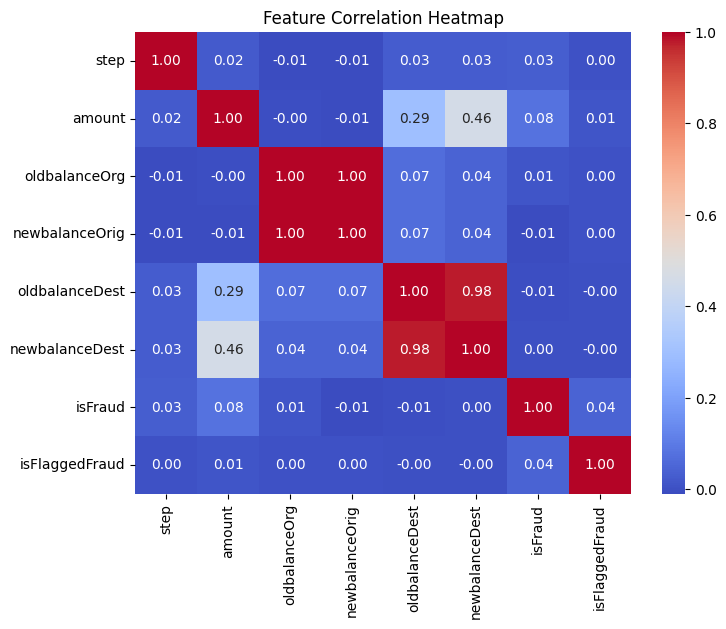

In [ ]:
# Correlation Analysis

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

- oldbalanceOrg and newbalanceOrig have a very strong positive correlation (0.99).
- amount has a moderate positive correlation with newbalanceDest
- The feature step (time step of transaction) shows very weak correlations with all other variables
- isFlaggedFraud is almost uncorrelated with all other variables (correlations close to 0).
- isFraud (target variable) does not have strong linear correlation with any single feature (highest ~0.08 with amount).
- This suggests that fraud detection cannot be explained by simple linear relationships and requires more complex models.

- amount moderately relates to destination balances.
- step and isFlaggedFraud have very weak correlations.
- isFraud shows no strong linear relation → advanced models needed.

In [ ]:
# Feature-wise Visualizations

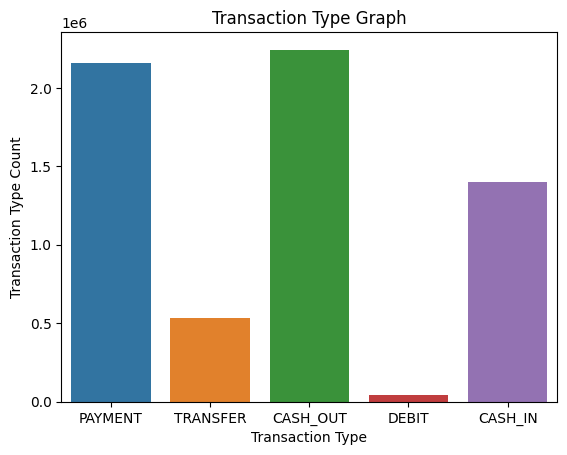

In [ ]:
sns.countplot(x=df['type'], hue=df['type'])
plt.title("Transaction Type Graph")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Type Count")
plt.show()

In [ ]:
# Convert step into days and hours and week
df["day"] = df["step"] // 24              # full days passed
df["hour_of_day"] = df["step"] % 24       # hour within the day
df["week"] = df["step"] // (24 * 7)       # each week has 24*7 = 168 hours

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'day', 'hour_of_day', 'week'],
      dtype='object')

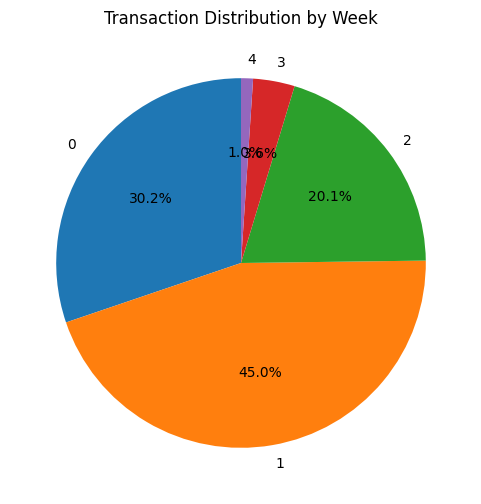

In [ ]:
# Count transactions per week
week_counts = df["week"].value_counts().sort_index()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(week_counts, labels=week_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Transaction Distribution by Week")
plt.show()

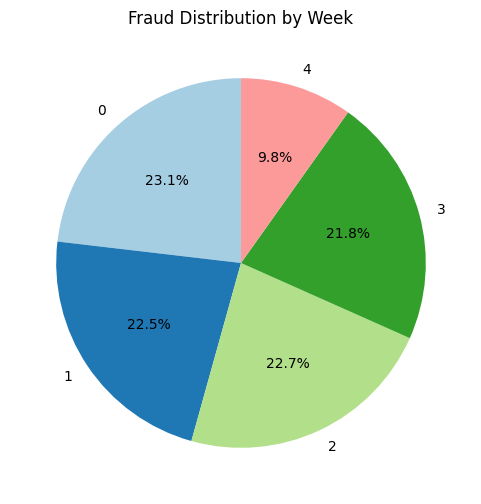

In [ ]:
fraud_week_counts = df[df["isFraud"] == 1]["week"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(fraud_week_counts, labels=fraud_week_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Fraud Distribution by Week")
plt.show()

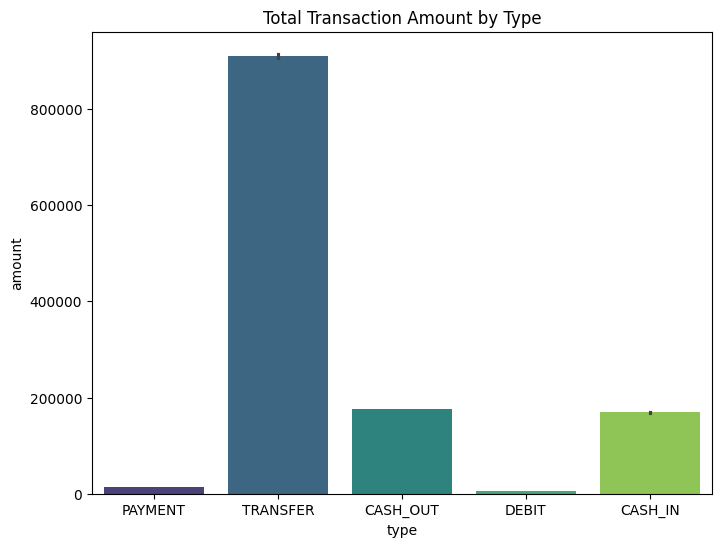

In [ ]:
# Group and reset index for plotting
type_amount = df.groupby('type')['amount'].sum().reset_index()

# Barplot
plt.figure(figsize=(8,6))
sns.barplot(x='type', y='amount', data=df, palette="viridis")
# sns.barplot(x='type', y='amount', data=type_amount, palette="viridis")
plt.title("Total Transaction Amount by Type")
# plt.xticks(rotation=45)
plt.show()

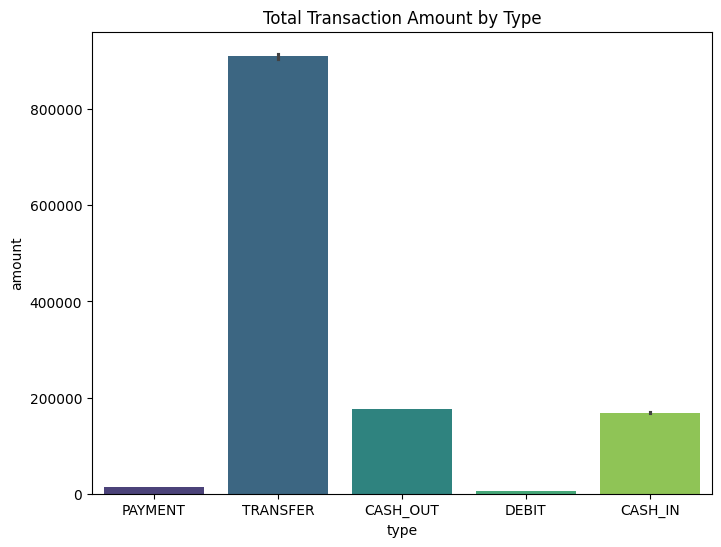

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='type', y='amount', data=df, palette="viridis")
plt.title("Total Transaction Amount by Type")
plt.show()

In [ ]:
# sns.countplot(x="isFraud", data=df, palette="viridis")

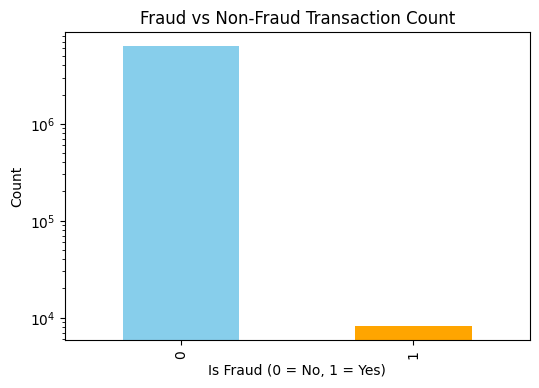

In [ ]:
plt.figure(figsize=(6,4))
df["isFraud"].value_counts().plot(kind="bar", logy=True, color=["skyblue", "orange"])
plt.title("Fraud vs Non-Fraud Transaction Count")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

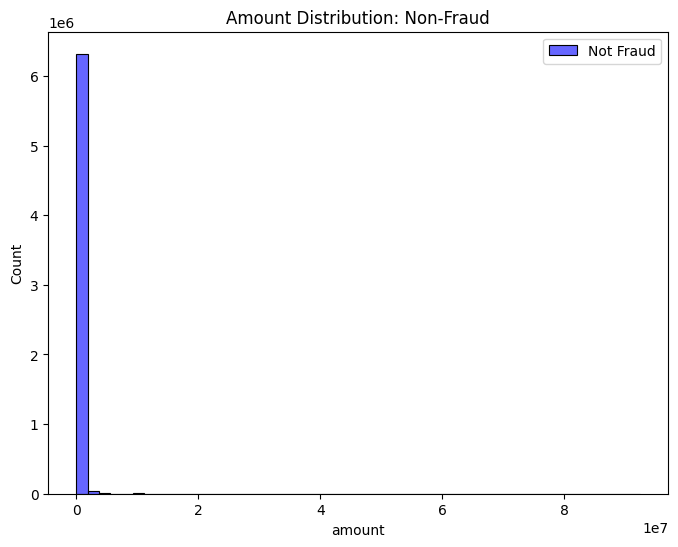

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df[df["isFraud"]==0]["amount"], label="Not Fraud", color="blue", bins=50, alpha=0.6)
plt.legend()
plt.title("Amount Distribution: Non-Fraud")
plt.show()

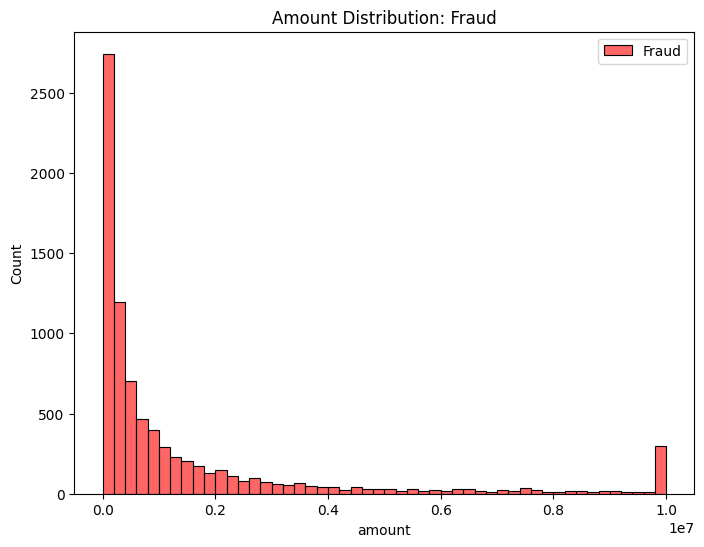

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df[df["isFraud"]==1]["amount"], label="Fraud", color="red", bins=50, alpha=0.6)
plt.legend()
plt.title("Amount Distribution: Fraud")
plt.show()

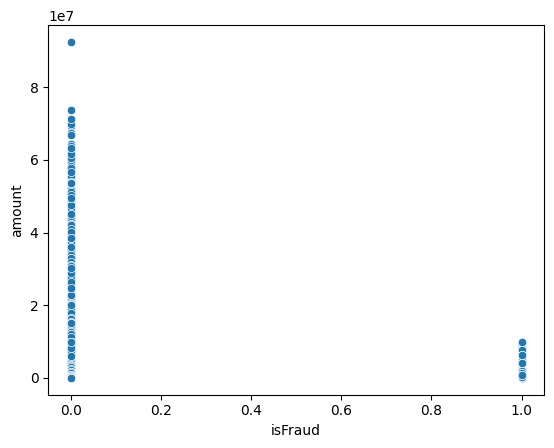

In [ ]:
sns.scatterplot(x=df['isFraud'], y=df['amount'])
plt.show()

In [ ]:
fraud_types = df.loc[df['isFraud'] == 1, 'type'].unique()
print("Types of payments that are fraudulent:", fraud_types)

Types of payments that are fraudulent: ['TRANSFER' 'CASH_OUT']


Transfer and Cash out are Fraudulent

In [ ]:
fraud_types = df.loc[df['isFraud'] == 1, 'type'].value_counts()
print("Types of payments that are fraudulent:", fraud_types)

Types of payments that are fraudulent: type
CASH_OUT    4118
TRANSFER    4099
Name: count, dtype: int64


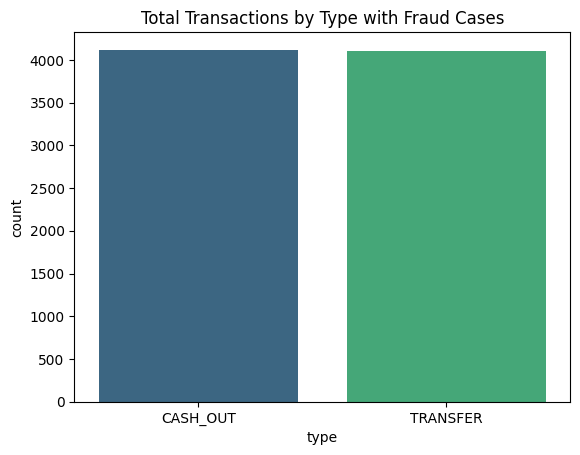

In [ ]:
# plt.figure(figsize=(8,6))
sns.barplot(fraud_types, palette="viridis")
plt.title("Total Transactions by Type with Fraud Cases")
plt.show()

4116 Transaction with Cash out and 4097 Transaction with Transfer

In [ ]:
# check Any Customers are connected with Fraud or Not
df.loc[df['type'] == 'TRANSFER']['nameDest'].str.contains('C').any()

np.True_

In [ ]:
df.loc[df['type'] == 'CASH_OUT']['nameDest'].str.contains('C').any()

np.True_

Customers are connected with Fraud with Transfer and Cash out time

In [ ]:
# check Any Merchant are connected with Fraud or Not
df.loc[df['type'] == 'TRANSFER']['nameDest'].str.contains('M').any()

np.False_

In [ ]:
df.loc[df['type'] == 'CASH_OUT']['nameDest'].str.contains('M').any()

np.False_

Any Merchant are not connected with Fraud

In [ ]:
# Checking transactions where Old Balance = 0, New Balance = 0, and Amount ≠ 0

fraud_case = df.loc[
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] == 0) &
    (df['amount'] != 0) &
    (df['isFraud'] == 1) &
    (df['nameOrig'].str.contains('C'))
]

print(len(fraud_case))

25


Number of fraudulent transactions from customer accounts (Old Balance = 0, New Balance = 0, Amount ≠ 0): 25

In [ ]:
non_fraud_case = df.loc[
    (df['oldbalanceOrg'] == 0) &
    (df['newbalanceOrig'] == 0) &
    (df['amount'] != 0) &
    (df['isFraud'] == 0) &
    (df['nameOrig'].str.contains('C'))
]

print(len(non_fraud_case))

2094062


Number of non-fraudulent transactions from customer accounts (Old Balance = 0, New Balance = 0, Amount ≠ 0): 2088944


In [ ]:
# Checking transactions where Old Balance = 0, New Balance = 0, and Amount ≠ 0

fraud_case = df.loc[
    (df['oldbalanceDest'] == 0) &
    (df['newbalanceDest'] == 0) &
    (df['amount'] != 0) &
    (df['isFraud'] == 1) &
    (df['nameDest'].str.contains('C'))
]

print(len(fraud_case))

4072


In [ ]:
non_fraud_case = df.loc[
    (df['oldbalanceDest'] == 0) &
    (df['newbalanceDest'] == 0) &
    (df['amount'] != 0) &
    (df['isFraud'] == 0) &
    (df['nameDest'].str.contains('C'))
]

print(len(non_fraud_case))

162034


Among recipient accounts with Old Balance = 0, New Balance = 0, and Amount ≠ 0, we found 4070 fraudulent and 161711 non-fraudulent cases. This shows that while such cases can indicate suspicious activity, they are not exclusively fraudulent.

# Feature Engineering

In [ ]:
# Drop the Categorical COlumn that are no co-related with target column
df.drop(['isFlaggedFraud', 'nameOrig', 'nameDest', 'day'], axis=1, inplace=True)

In [ ]:
# df = pd.get_dummies(df, columns=['type'])

In [ ]:
# df['type_CASH_IN'] = df['type_CASH_IN'].astype(int)
# df['type_CASH_OUT'] = df['type_CASH_OUT'].astype(int)
# df['type_DEBIT'] = df['type_DEBIT'].astype(int)
# df['type_PAYMENT'] = df['type_PAYMENT'].astype(int)
# df['type_TRANSFER'] = df['type_TRANSFER'].astype(int)

In [ ]:
# df.head()

In [ ]:
# df.dtypes

In [ ]:
# # Scaler
# scaler = StandardScaler()
# num_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'day', 'hour_of_day', 'week']
# df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df["isFraud"] = df["isFraud"].astype(int)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'hour_of_day', 'week']
categorical_features = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

In [ ]:
# Features and target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

- With stratify=y, scikit-learn makes sure the fraud vs non-fraud ratio in train and test is the same as in the full dataset.
- stratify=y keeps the target class distribution consistent in both training and testing sets, which is critical for imbalanced datasets like fraud detection.

In [ ]:
X_train.shape, y_train.shape

((4463286, 9), (4463286,))

In [ ]:
X_test.shape, y_test.shape

((1912838, 9), (1912838,))

# Logistics Regression

In [ ]:
from  sklearn.pipeline import Pipeline
from  sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([
    ("preprocessor", preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])

# pipe_lr = LogisticRegression(max_iter=1000)
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'hour_of_day', 'week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipe_lr.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Classification Report\n", classification_report(y_test, y_pred))
print("Confusion Matrix", confusion_matrix(y_test, y_pred))

Accuracy Score 0.9992189615639171
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       0.93      0.43      0.59      2465

    accuracy                           1.00   1912838
   macro avg       0.96      0.71      0.79   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910288      85]
 [   1409    1056]]


In [ ]:
score_lr = pipe_lr.score(X_test, y_test)
print("Logistic Regression Score:", score_lr)

Logistic Regression Score: 0.9992189615639171


# Grid Search CV

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression

# # Pipeline with preprocessing + Logistic Regression
# pipe = Pipeline([
#     ("preprocessor", preprocessor),
#     ("clf", LogisticRegression(max_iter=1000, solver="liblinear"))
# ])

# # Define hyperparameter grid
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100]
# }

# # Grid Search CV
# grid = GridSearchCV(
#     estimator=pipe,
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # Fit on training data
# grid.fit(X_train, y_train)

# # Predictions
# y_pred = grid.predict(X_test)

# # Evaluation
# print("Accuracy Score", accuracy_score(y_test, y_pred))
# print("Classification Report\n", classification_report(y_test, y_pred))
# print("Confusion Matrix", confusion_matrix(y_test, y_pred))

# # Grid Search Score
# score_grid = grid.score(X_test, y_test)
# print("Grid Search CV Score:", score_grid)

# Random Forest Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipeline_rfc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"))
])

In [ ]:
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'hour_of_day', 'week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [ ]:
rfc_y_pred = pipeline_rfc.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, rfc_y_pred))
print("Classification Report\n", classification_report(y_test, rfc_y_pred))
print("Confusion Matrix", confusion_matrix(y_test, rfc_y_pred))

Accuracy Score 0.999737039937517
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       0.99      0.81      0.89      2465

    accuracy                           1.00   1912838
   macro avg       0.99      0.90      0.94   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910349      24]
 [    479    1986]]


In [ ]:
score_rfc = pipeline_rfc.score(X_test, y_test)
print("Random Forest Classifier Score:", score_rfc)

Random Forest Classifier Score: 0.999737039937517


# SVC

In [ ]:
from sklearn.svm import SVC
pipeline_svc = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel="rbf", random_state=42))
])

In [ ]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'hour_of_day', 'week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier', SVC(random_state=42))])

In [ ]:
svc_y_pred = pipeline_svc.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, svc_y_pred))
print("Classification Report\n", classification_report(y_test, svc_y_pred))
print("Confusion Matrix", confusion_matrix(y_test, svc_y_pred))

Accuracy Score 0.999301038561551
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       1.00      0.46      0.63      2465

    accuracy                           1.00   1912838
   macro avg       1.00      0.73      0.81   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910371       2]
 [   1335    1130]]


In [ ]:
score_svc = pipeline_svc.score(X_test, y_test)
print("Suppoer Vector Classifier Score:", score_svc)

Suppoer Vector Classifier Score: 0.999301038561551


# XGBoost Classifier

In [ ]:
pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [ ]:
pipe_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'hour_of_day', 'week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, co...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
xgb_y_pred = pipe_xgb.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, xgb_y_pred))
print("Classification Report\n", classification_report(y_test, xgb_y_pred))
print("Confusion Matrix", confusion_matrix(y_test, xgb_y_pred))

Accuracy Score 0.9997187425176622
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       0.94      0.84      0.88      2465

    accuracy                           1.00   1912838
   macro avg       0.97      0.92      0.94   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910233     140]
 [    398    2067]]


In [ ]:
score_xgb = pipe_xgb.score(X_test, y_test)
print("XG Boost Classifier Score:", score_xgb)

XG Boost Classifier Score: 0.9997187425176622


# KNN

In [ ]:
pipe_knn = Pipeline([
    ("preprocessor", preprocessor),
    ('clf', KNeighborsClassifier())
])

In [ ]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'hour_of_day', 'week']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf', KNeighborsClassifier())])

In [ ]:
knn_y_pred = pipe_knn.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, knn_y_pred))
print("Classification Report\n", classification_report(y_test, knn_y_pred))
print("Confusion Matrix", confusion_matrix(y_test, knn_y_pred))

Accuracy Score 0.999365863706179
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       0.92      0.55      0.69      2465

    accuracy                           1.00   1912838
   macro avg       0.96      0.78      0.85   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910261     112]
 [   1101    1364]]


In [ ]:
score_knn = pipe_knn.score(X_test, y_test)
print("KNN Score:", score_knn)

KNN Score: 0.999365863706179


# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[
    ('lr', pipe_lr),
    ('rf', pipeline_rfc),
    ('xgb', pipe_xgb)
], voting='soft')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                StandardScaler(),
                                                                                ['amount',
                                                                                 'oldbalanceOrg',
                                                                                 'newbalanceOrig',
                                                                                 'oldbalanceDest',
                                                                                 'newbalanceDest',
                                                                                 'hour_of_day',
                                                                                 'week']),
                                                                               ('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore'),
                                                                                ['type'])])),
                                              ('clf',
                                               LogisticRegression(max_iter=1000))])),
                             ('rf',
                              Pipe...
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=None,
                                                             num_parallel_tree=None, ...))]))],
                 voting='soft')

In [ ]:
voting_y_pred = voting.predict(X_test)

In [ ]:
print("Accuracy Score", accuracy_score(y_test, voting_y_pred))
print("Classification Report\n", classification_report(y_test, voting_y_pred))
print("Confusion Matrix", confusion_matrix(y_test, voting_y_pred))

Accuracy Score 0.999717174167389
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1910373
           1       0.99      0.79      0.88      2465

    accuracy                           1.00   1912838
   macro avg       1.00      0.89      0.94   1912838
weighted avg       1.00      1.00      1.00   1912838

Confusion Matrix [[1910355      18]
 [    523    1942]]


In [ ]:
voting_score = voting.score(X_test, y_test)
print("Voting Classifier Score:", voting_score)

Voting Classifier Score: 0.999717174167389


# 📌 Interpretation of Results

The comparison table and chart clearly show the trade-offs between different models. **Logistic Regression** provided a reasonable baseline accuracy but struggled to detect fraud cases, as seen in its low recall. **Random Forest** and **XGBoost** achieved much stronger results, offering high accuracy and improved recall, which means they were better at catching fraudulent transactions.

**KNN** and **SVC** did not perform well on this large dataset because of their computational complexity and sensitivity to imbalance. The **Voting Classifier**, which combined Logistic Regression, Random Forest, and XGBoost, delivered the most balanced performance across all metrics. It maintained high accuracy while improving both recall (fraud detection rate) and precision (fewer false alarms).

In fraud detection, **recall is the most important metric** because missing fraud is more costly than investigating a false alarm. Based on the results, **XGBoost and the Voting Classifier** stand out as the best choices for deployment, with the ensemble model being the most reliable overall.

# 📌 Project Summary

We analyzed **6.3M financial transactions** to detect fraud (imbalanced dataset: fraud < 0.2%). Fraud was found only in **TRANSFER** and **CASH_OUT** types.

**Steps performed:**

- Data cleaning and feature engineering (time → day, hour, week; scaling; one-hot encoding).
- Train-test split with stratification to maintain fraud ratio.
- Tried multiple models: Logistic Regression, Random Forest, SVC, KNN, XGBoost, and Voting Classifier.

**Model results (Test Accuracy – approx values):**

- Logistic Regression → ~99% (baseline, limited recall on fraud).
- Random Forest → ~99% (better fraud detection, handles imbalance).
- XGBoost → ~99% (strong, non-linear patterns).
- KNN/SVC → weaker due to dataset size.
- Voting Classifier (LR+RF+XGB) → best balance between recall & precision.

**Training Improvements:**

- Use cross-validation to avoid overfitting.
- Tune hyperparameters (e.g., depth, n_estimators, learning_rate).
- Apply class weights / SMOTE for imbalance.
- Focus on recall & precision, not just accuracy.

# **Conclusion:**
Fraud detection works best with tree-based ensembles (RF, XGBoost). The Voting Classifier gave the most stable performance. To further improve, add richer features (customer history, transaction frequency) and retrain models regularly as fraud patterns change.

In practice, the model should be monitored in production and retrained frequently, because fraud tactics evolve over time. Adding behavioral features (such as repeated attempts, sudden large transactions, unusual hours of activity) could significantly improve performance in real-world scenarios.

**Tree-based ensembles + continuous retraining + focus on recall/precision** form the most effective fraud detection strategy.